# Downloading SAMOS data from MarineFlux ERDDAP server

In [43]:
from erddapy import ERDDAP
import matplotlib.pyplot as plt
import numpy as np
import cf_xarray

## Create the ERDDAP request

In [44]:
flux_algorithms = ["S88", "B23", "C36"]
vars = ['C_d', 'C_d_qc', 'C_h', 'C_h_qc', 'C_e', 'C_e_qc']
start_time = "2021-01-15T00:00:00Z"
end_time = "2021-01-17T00:00:00Z"

In [45]:
erddap_samos = dict()
for algo in flux_algorithms:
  erddap_samos[algo] = ERDDAP(
    server="http://marineflux-erddap.coaps.fsu.edu/erddap",
    protocol="tabledap",
  )

  erddap_samos[algo].dataset_id = f"SAMOS_Fluxes_{algo}"
  erddap_samos[algo].constraints = {
      "time>=": start_time,
      "time<=": end_time,
      "platform_call_sign=": "WTEC"
  }
  erddap_samos[algo].variables = vars

## Request data as xarray Dataset

In [46]:
ds = dict()

for algo in flux_algorithms:
    ds[algo] = erddap_samos[algo].to_xarray()

    print(ds[algo])

<xarray.Dataset>
Dimensions:    (row: 2116)
Coordinates:
    longitude  (row) float32 ...
    latitude   (row) float32 ...
    time       (row) datetime64[ns] ...
Dimensions without coordinates: row
Data variables:
    C_d        (row) float64 ...
    C_d_qc     (row) float32 ...
    C_h        (row) float64 ...
    C_h_qc     (row) float32 ...
    C_e        (row) float64 ...
    C_e_qc     (row) float32 ...
Attributes: (12/39)
    acknowledgement:           NOAA/CPO/COM via award NA21OAR4310262
    cdm_data_type:             Point
    comment:                   These data are all of the input variables and ...
    Conventions:               COARDS, CF-1.6, ACDD-1.3
    creator_name:              Marine Data Center, Center for Ocean-Atmospher...
    creator_type:              institution
    ...                        ...
    summary:                   SAMOS Air-Sea Fluxes - S88. These data are all...
    testOutOfDate:             now-23days
    time_coverage_end:         2021-01-17T

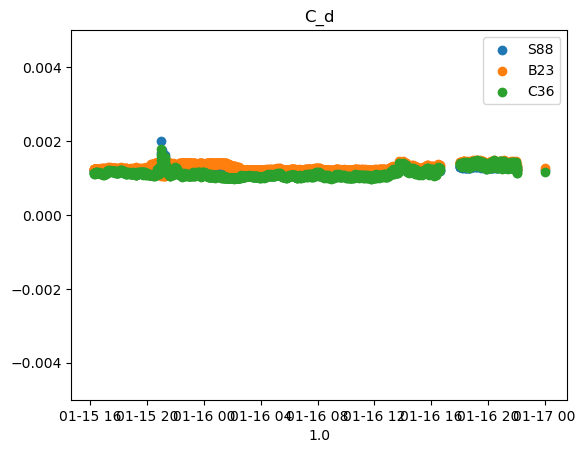

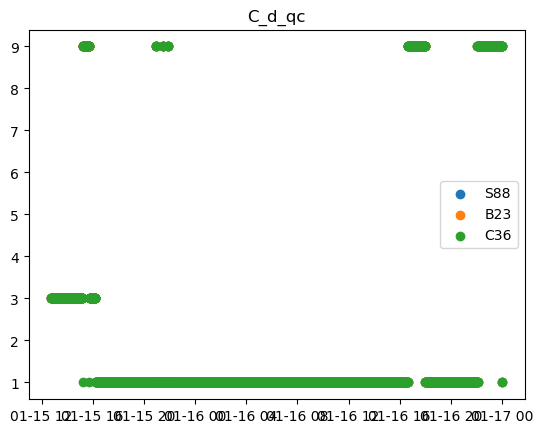

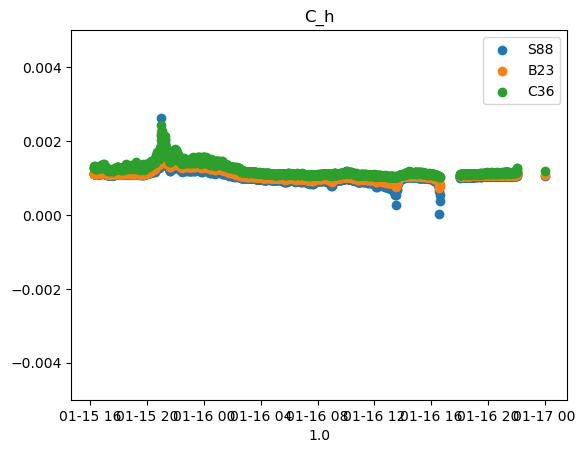

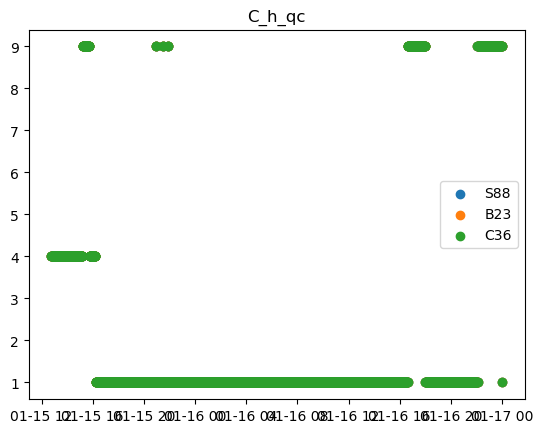

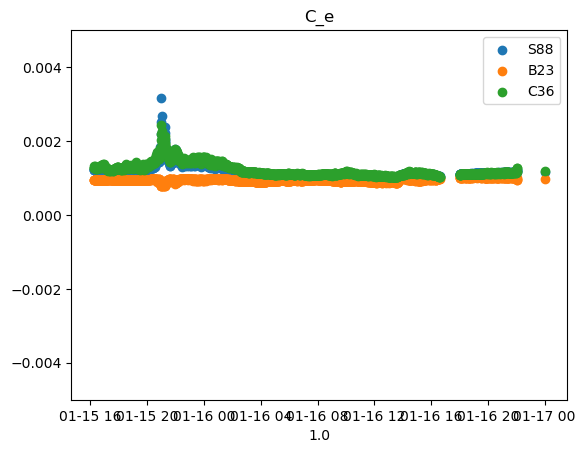

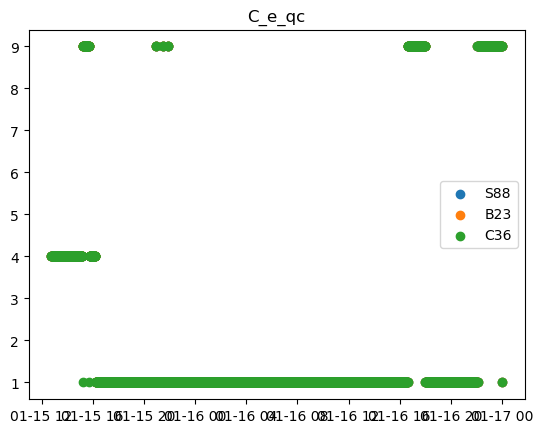

In [47]:
for var in vars:
    y = []
    for algo in flux_algorithms:

        data = ds[algo][var].data
        data[data==-9999.0] = np.nan

        if f'{var}_qc' in ds[algo]:
            good_indices = np.where((ds[algo][f'{var}_qc'].cf == 'good') == True)[0]
            plt.scatter(ds['S88']['time'].data[good_indices], data[good_indices], label=algo)
            plt.ylim(-0.005, 0.005)
        else:
            plt.scatter(ds['S88']['time'].data, data, label=algo)

        y.append(data)

    if 'units' in ds['S88'][var].attrs:
        plt.xlabel(ds['S88'][var].units)

    
    plt.title(f'{var}')
    plt.legend()
    plt.show()